In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
conn = sqlite3.connect('FORM13F.db')
cursor = conn.cursor()
table_name = "INFOTABLE_2024_Q3"
s = f"""
SELECT * FROM {table_name};
"""
df_ = pd.read_sql(s, conn)
conn.close()

DatabaseError: Execution failed on sql '
SELECT * FROM INFOTABLE_2024_Q3;
': no such table: INFOTABLE_2024_Q3

## Table Names

In [53]:
timeframe = '2024_Q3'
table_names = [
    "COVERPAGE", "INFOTABLE", "OTHERMANAGER", 
    "OTHERMANAGER2","SIGNATURE", "SUBMISSION", "SUMMARYPAGE"]

for table_name in table_names:
    print(f"Table: {table_name}_{timeframe}")

Table: COVERPAGE_2024_Q3
Table: INFOTABLE_2024_Q3
Table: OTHERMANAGER_2024_Q3
Table: OTHERMANAGER2_2024_Q3
Table: SIGNATURE_2024_Q3
Table: SUBMISSION_2024_Q3
Table: SUMMARYPAGE_2024_Q3


## Summary Page

In [55]:
conn = sqlite3.connect('FORM13F.db')
cursor = conn.cursor()
df_summarypage = pd.read_sql(f"SELECT * FROM SUMMARYPAGE_{timeframe};", conn)
conn.close()

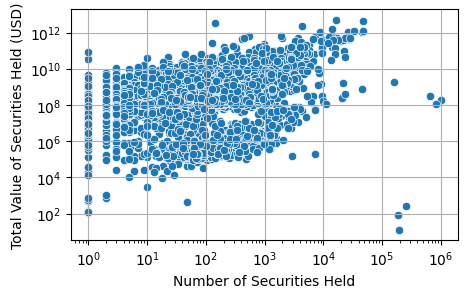

In [78]:
x = df_summarypage['TABLEENTRYTOTAL']
y = df_summarypage['TABLEVALUETOTAL']
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5, 3))
sns.scatterplot(x=x, y=y, ax=ax)
ax.set_yscale('log'), ax.set_xscale('log')
ax.grid(True)
ax.set_xlabel('Number of Securities Held')
ax.set_ylabel("Total Value of Securities Held (USD)")
plt.show()

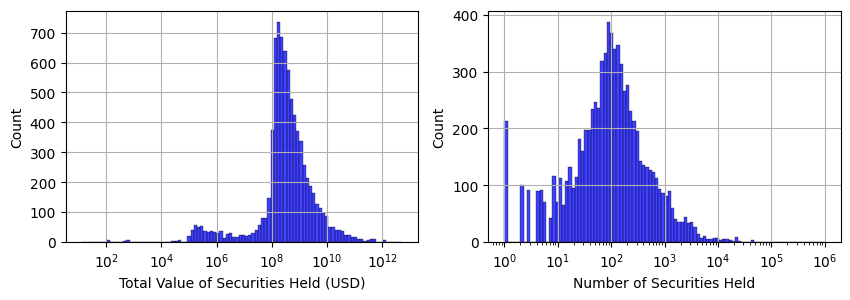

In [79]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 3))
sns.histplot(y, bins=100, log_scale=True, ax=ax[0], color='blue')
sns.histplot(x, bins=100, log_scale=True, ax=ax[1], color='blue')

ax[0].set_xlabel('Total Value of Securities Held (USD)')
ax[1].set_xlabel('Number of Securities Held')
ax[0].grid(True), ax[1].grid(True)
plt.show()

## Infotable

In [80]:
conn = sqlite3.connect('FORM13F.db')
cursor = conn.cursor()
df_infotable = pd.read_sql(f"SELECT * FROM INFOTABLE_{timeframe};", conn)
conn.close()

In [91]:
for col in df_infotable.columns:
    print(col)

ACCESSION_NUMBER
INFOTABLE_SK
NAMEOFISSUER
TITLEOFCLASS
CUSIP
FIGI
VALUE
SSHPRNAMT
SSHPRNAMTTYPE
PUTCALL
INVESTMENTDISCRETION
OTHERMANAGER
VOTING_AUTH_SOLE
VOTING_AUTH_SHARED
VOTING_AUTH_NONE


## Value Counts Plot

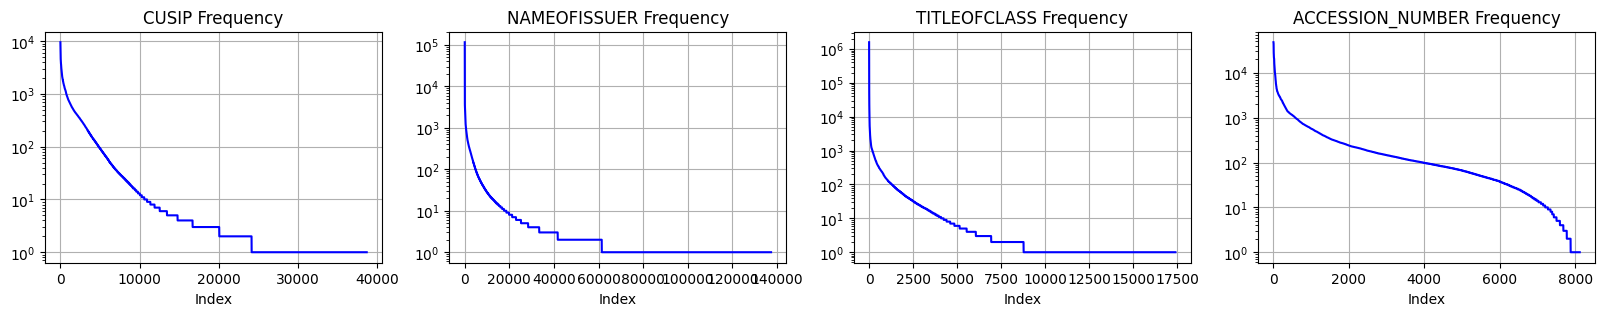

In [126]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20, 3))
ax[0].plot(df_infotable['CUSIP'].value_counts().values, color='blue')
ax[0].set_yscale('log')
ax[0].set_title("CUSIP Frequency")
ax[0].set_xlabel("Index")
ax[0].grid(True)

ax[1].plot(df_infotable['NAMEOFISSUER'].value_counts().values, color='blue')
ax[1].set_yscale('log')
ax[1].set_title("NAMEOFISSUER Frequency")
ax[1].set_xlabel("Index")
ax[1].grid(True)

ax[2].plot(df_infotable['TITLEOFCLASS'].value_counts().values, color='blue')
ax[2].set_yscale('log')
ax[2].set_title("TITLEOFCLASS Frequency")
ax[2].set_xlabel("Index")
ax[2].grid(True)

ax[3].plot(df_infotable['ACCESSION_NUMBER'].value_counts().values, color='blue')
ax[3].set_yscale('log')
ax[3].set_title("ACCESSION_NUMBER Frequency")
ax[3].set_xlabel("Index")
ax[3].grid(True)

## Histograms

In [128]:
# load some more data
# principal amount of the security
conn = sqlite3.connect('FORM13F.db')
cursor = conn.cursor()
df_infotable2 = pd.read_sql(f"SELECT * FROM INFOTABLE_{timeframe} WHERE SSHPRNAMTTYPE = 'PRN';", conn)
df_infotable2['PUTCALL'] = df_infotable2['PUTCALL'].replace('', 'N/A')
df_infotable2['PUTCALL'] = df_infotable2['PUTCALL'].fillna('N/A')
# df_infotable2.head()
df_infotable3 = pd.read_sql(f"SELECT * FROM INFOTABLE_{timeframe} WHERE SSHPRNAMTTYPE = 'SH';", conn)
df_infotable3['PUTCALL'] = df_infotable3['PUTCALL'].replace('', 'N/A')
df_infotable3['PUTCALL'] = df_infotable3['PUTCALL'].fillna('N/A')
df_infotable3.head()
conn.close()

In [131]:
df_infotable3.head()

,ACCESSION_NUMBER,INFOTABLE_SK,NAMEOFISSUER,TITLEOFCLASS,CUSIP,FIGI,VALUE,SSHPRNAMT,SSHPRNAMTTYPE,PUTCALL,INVESTMENTDISCRETION,OTHERMANAGER,VOTING_AUTH_SOLE,VOTING_AUTH_SHARED,VOTING_AUTH_NONE
0,0002035951-24-000001,105173078,ABBOTT LABS,COM,002824100,None,238370,2294,SH,N/A,SOLE,None,2294,0,0
1,0002035951-24-000001,105173079,SCHWAB STRATEGIC TR,FUNDAMENTAL US S,808524763,None,413887,7536,SH,N/A,SOLE,None,7536,0,0
2,0002035951-24-000001,105173080,CISCO SYS INC,COM,17275R102,None,616954,12986,SH,N/A,SOLE,None,12986,0,0
3,0002035951-24-000001,105173081,DEERE & CO,COM,244199105,None,422202,1130,SH,N/A,SOLE,None,1130,0,0
4,0002035951-24-000001,105173082,MERCK & CO INC,COM,58933Y105,None,254362,2055,SH,N/A,SOLE,None,2055,0,0


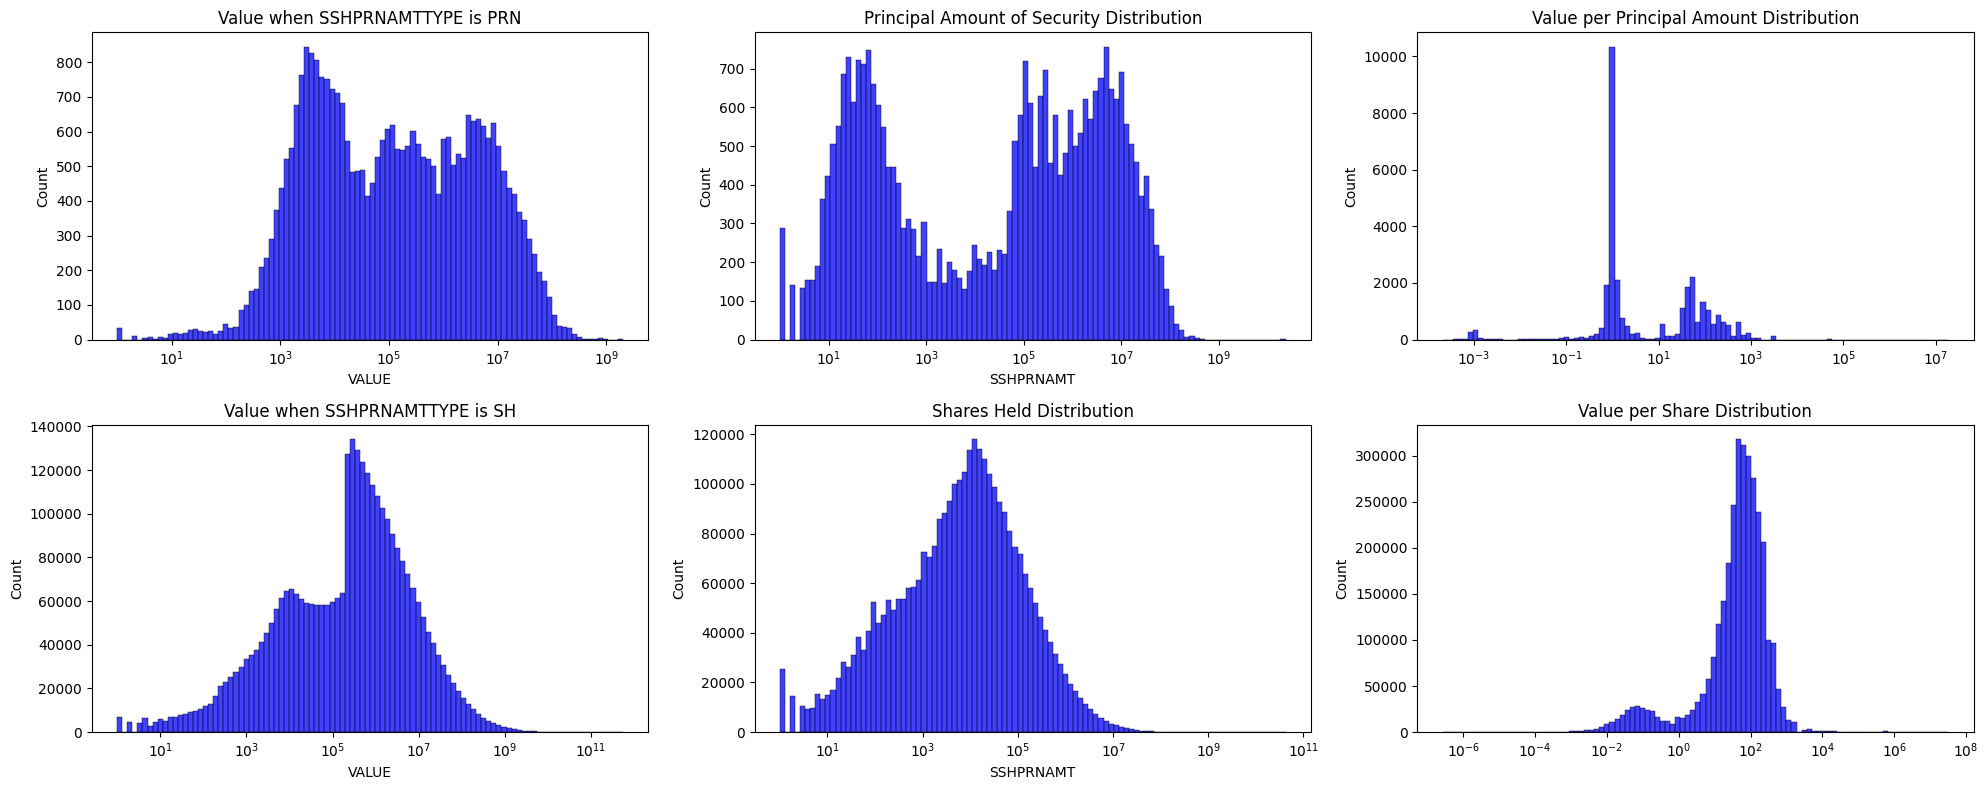

In [129]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20, 8))

sns.histplot(df_infotable2['VALUE'], bins=100, log_scale=True, ax=ax[0,0], color='blue')
ax[0,0].set_title("Value when SSHPRNAMTTYPE is PRN")

sns.histplot(df_infotable2['SSHPRNAMT'], bins=100, log_scale=True, color='blue', ax=ax[0,1])
ax[0,1].set_title("Principal Amount of Security Distribution")

sns.histplot(df_infotable3['VALUE'], bins=100, log_scale=True, ax=ax[1,0], color='blue')
ax[1,0].set_title("Value when SSHPRNAMTTYPE is SH")


sns.histplot(df_infotable2['VALUE']/df_infotable2['SSHPRNAMT'], bins=100, log_scale=True, color='blue', ax=ax[0,2])
ax[0,2].set_title("Value per Principal Amount Distribution")

sns.histplot(df_infotable3['SSHPRNAMT'], bins=100, log_scale=True, color='blue', ax=ax[1,1])
ax[1,1].set_title("Shares Held Distribution")

sns.histplot(df_infotable3['VALUE']/df_infotable3['SSHPRNAMT'], bins=100, log_scale=True, color='blue', ax=ax[1,2])
ax[1,2].set_title("Value per Share Distribution")
plt.tight_layout()
plt.show()

## Scatter Plots

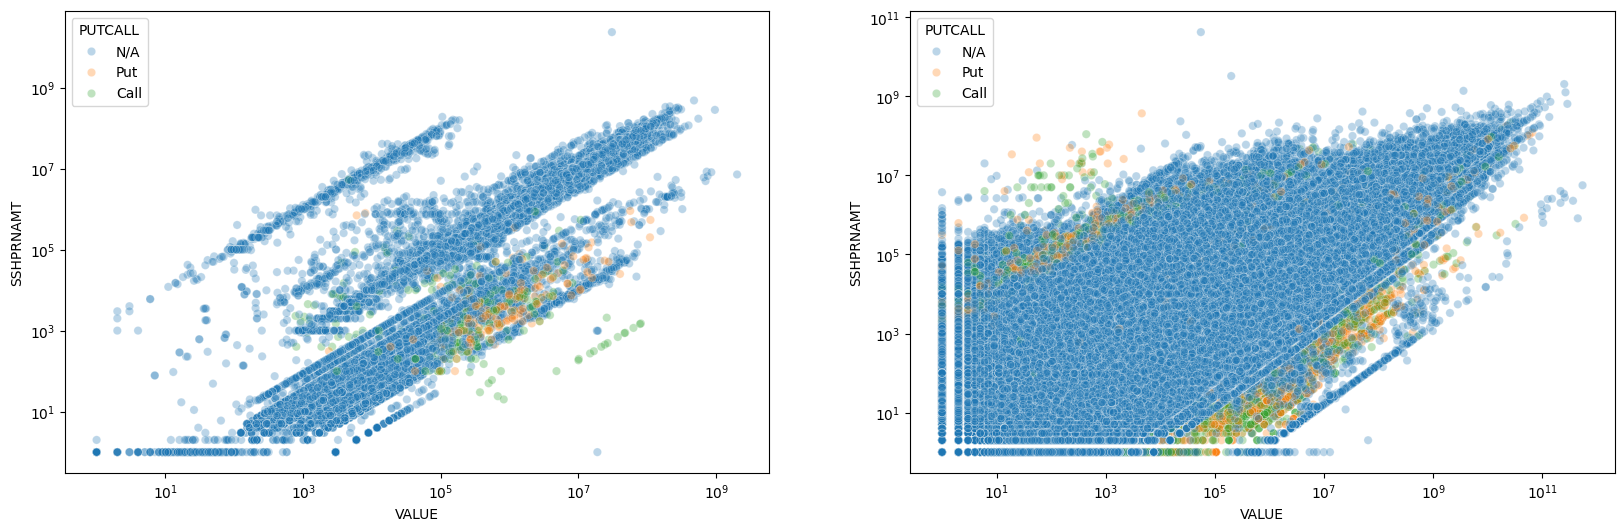

In [135]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20, 6))
# sns.scatterplot(x=df_infotable2['VALUE'], y=df_infotable2['SSHPRNAMT'], ax=ax[0])
sns.scatterplot(x = 'VALUE', y = 'SSHPRNAMT' , hue='PUTCALL', data = df_infotable2, ax=ax[0], alpha=0.3)
ax[0].set_yscale('log'), ax[0].set_xscale('log')

sns.scatterplot(data = df_infotable3, x='VALUE', y='SSHPRNAMT',hue ='PUTCALL', ax=ax[1], alpha=0.3)
ax[1].set_yscale('log'), ax[1].set_xscale('log')
# plt.tight_layout()
plt.show()